<a href="https://colab.research.google.com/github/diogocarneiro20/Bolsa-de-valores/blob/main/C%C3%B3pia_de_Projeto_I_Primeiro_Semestre_2023_Aplica%C3%A7%C3%A3o_de_M%C3%A9todos_de_Aprendizagem_de_M%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projeto I - Primeiro Semestre 2023**  
#**Aplicação de Métodos de Aprendizagem de Máquina**

---
<hr>

**Nome do Acadêmico**: Alexandre Bruno Dos Santos<br>
**Matrícula**: 1947015

**Nome do Acadêmico**: Diogo de Paiva Carneiro<br>
**Matrícula**: 3289185

**Nome do Acadêmico**: Suzana Aparecida Alves<br>
**Matrícula**: 2468442

---
<hr>


## Definição do Tema


 Atualmente houve um aumento de pessoas interessadas no mercado financeiro, com isso nasceu a necesidade de buscar estudar os padrões de movimentações dos valores de ativos na bolsa, sendo assim, o intuito aqui é poder estudar um ativo e expecifico e poder analisar padrões e prever valores que poderão haver alta ou queda de valores.
<br>
<br>
## Especificação Técnica

Os dados estudados nesse projeto são referente a ações extraidas do [Yahoo Finance](https://finance.yahoo.com/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAADddxfszKU-F9tNOyDB_oka8h75NUER1OHpsqUFKSBTkZZz6lZdiiDWdgV1ndWoUTimFUBNR1opAfPbBsRMW_hajluDY-XX34AMtNOFlJ4x0iAIUxVi4iySHsMkJ-7wxRW3UFXdox-dPzHabxBvlEzslMQlHdTIf6F_OOcLHYgCG), para isso necessário instalar a biblioteca via *pip install yfinance*.

A ação escolhida foi do [Banco Bradesco](https://finance.yahoo.com/quote/BBDC4.SA?p=BBDC4.SA&.tsrc=fin-srch),usaremos dados para avaliação no  periodo de um ano.

Outra biblioteca importante aqui que deveremos baixar é *pip install mplfinance*, essa nos trará a visão de do gráfico de ações mais utilizado no mercado financeiro que é o **candlestick**

Cada coluna da nossa base representa uma informação específica:

- **Date**: A data em que o preço foi registrado.
- **Open**: O preço de abertura da ação naquela data.
- **High**: O preço mais alto alcançado pela ação durante o dia.
- **Low**: O preço mais baixo alcançado pela ação durante o dia.
- **Close**: O preço de fechamento da ação naquela data.
- **Adj Close**: O preço de fechamento ajustado da ação, levando em consideração eventos como dividendos, desdobramentos, etc.
- **Volume**: O volume de negociações da ação naquela data.

Iremos testar alguns modelos para poder fazer essa previsão de alta e baixa nos valores, os algoritimos escolhidos são todos de regreção sendo, *Regressão Linear*, *Arvore de regressão* e *Regressão Logistica*

Como métrica de avaliação usaremos:

- Erro médio absoluto (MAE): Calcula a média das diferenças absolutas entre as previsões e os valores reais. Quanto menor o valor do MAE, melhor o desempenho do modelo.

- Erro quadrático médio (MSE): Calcula a média dos erros ao quadrado entre as previsões e os valores reais. O MSE atribui maior peso a erros maiores. Novamente, quanto menor o valor do MSE, melhor o desempenho do modelo.

- Raiz quadrada do erro quadrático médio (RMSE): É a raiz quadrada do MSE e representa uma medida de erro médio. Assim como o MSE, quanto menor o valor do RMSE, melhor o desempenho do modelo.

- Coeficiente de determinação (R²): Varia de 0 a 1 e indica a proporção da variabilidade dos valores de saída que é explicada pelo modelo. Um valor de R² mais próximo de 1 indica um melhor ajuste do modelo aos dados.


### Baixando e Importando Bibliotecas.

A partir dessas principais já poderemos fazer analises e vizualização dos dados

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
from datetime import datetime

## Determinado Ticket da Ação e Período dos Dados

In [ ]:
ticker = 'BBDC4.SA'
df = yf.download(ticker, start='2022-06-20', end='2023-06-20')
print(df.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2022-06-20  18.660000  19.139999  18.629999  18.969999  17.787029  38181500
2022-06-21  18.879999  19.049999  18.540001  18.639999  17.660631  30440200
2022-06-22  18.639999  18.680000  18.410000  18.559999  17.584835  35022300
2022-06-23  18.650000  18.650000  17.990000  18.070000  17.120581  36957800
2022-06-24  18.190001  18.190001  17.920000  17.920000  16.978462  34188700


## Matriz de Correlação

Está é uma ótima opção para analisar a relação entre as diferentes variáveis dos seus dados históricos. Ao calcular e exibir a matriz de correlação, podemos identificar quais variáveis têm uma correlação positiva, negativa ou fraca entre si.

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.997063  0.996733  0.992504   0.982980 -0.226147
High       0.997063  1.000000  0.996846  0.997023   0.988092 -0.210725
Low        0.996733  0.996846  1.000000  0.997267   0.989707 -0.265612
Close      0.992504  0.997023  0.997267  1.000000   0.992828 -0.248704
Adj Close  0.982980  0.988092  0.989707  0.992828   1.000000 -0.258825
Volume    -0.226147 -0.210725 -0.265612 -0.248704  -0.258825  1.000000


<ipython-input-5-1381f43c1c8c>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

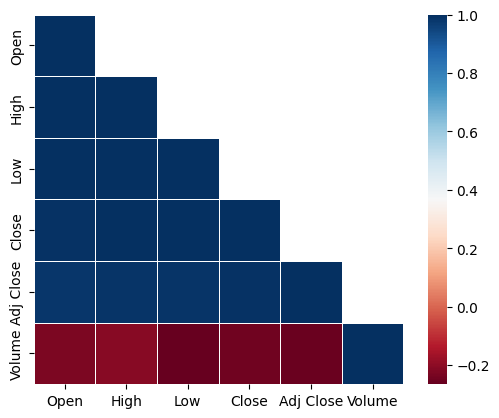

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)

corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask, 1)] = True

sns.heatmap(corr, mask=mask, cmap='RdBu', square=True, linewidths=.5)

Vamos interpretar os resultados considerando a matriz acima:

Os valores na diagonal principal (da esquerda superior para a direita inferior) representam a correlação entre a mesma variável. Esses valores são sempre 1, pois uma variável tem uma correlação perfeita consigo mesma.

As células fora da diagonal principal representam as correlações entre pares diferentes de variáveis. Por exemplo:
- O valor 0.997063 na interseção da linha "Open" e da coluna "High" indica uma correlação muito forte (quase perfeita) entre os preços de abertura e os preços mais altos.

- O valor -0.226147 na interseção da linha "Open" e da coluna "Volume" indica uma correlação negativa moderada entre o preço de abertura e o volume de negociações. Isso sugere que, em geral, quando o preço de abertura é alto, o volume de negociações tende a ser baixo, e vice-versa.

Os valores próximos a 1 indicam uma correlação positiva forte, enquanto valores próximos a -1 indicam uma correlação negativa forte. Valores próximos a 0 indicam uma correlação fraca ou inexistente.

In [ ]:
## Visualizando os dados de abertura e fechamento
print(df[['Open', 'Close']])

                 Open      Close
Date                            
2022-06-20  18.660000  18.969999
2022-06-21  18.879999  18.639999
2022-06-22  18.639999  18.559999
2022-06-23  18.650000  18.070000
2022-06-24  18.190001  17.920000
...               ...        ...
2023-06-13  16.719999  16.740000
2023-06-14  16.840000  16.850000
2023-06-15  16.850000  16.900000
2023-06-16  16.879999  16.950001
2023-06-19  16.980000  17.250000

[250 rows x 2 columns]


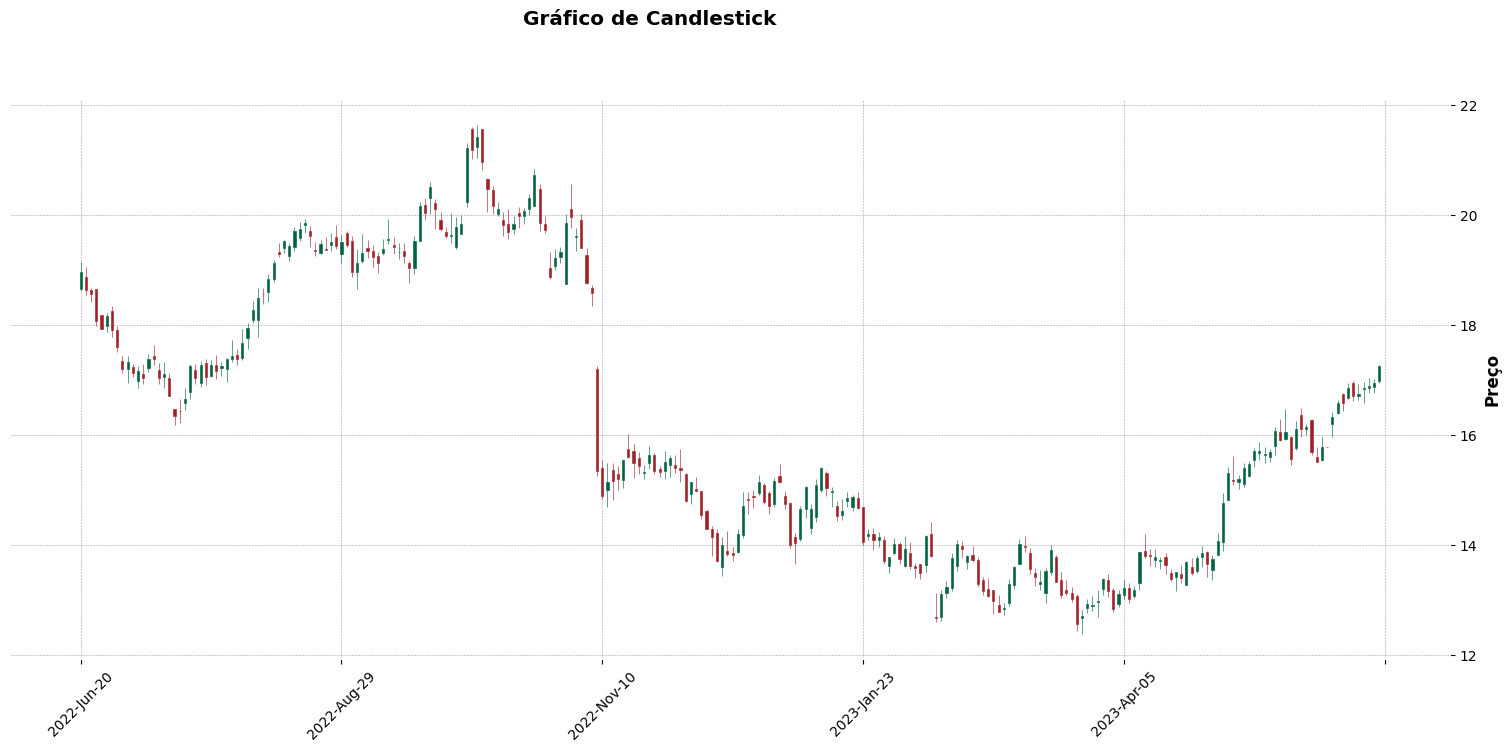

In [ ]:
# Definir data inicial e data final para exibição
start_date = '2022-06-20'
end_date = '2023-06-20'

figsize = (20, 8)

# Criar um gráfico de candlestick
mpf.plot(df[start_date:end_date], type='candle', style='charles', title='Gráfico de Candlestick', ylabel='Preço', ylabel_lower='Volume', figsize=figsize)


A partir do gráficos acima, notamos que nos períodos de novembro e dezembro 2022, apresentaram que o preço de fechamento foi menor do que o preço de abertura,e também conseguimos analisar após o mês de abril 2023 o preço de fechamento foi maior do que o preço de abertura.

Esse gráfico é chamado de candlestick e é muito utilizado por pessoas que fazem análise visual de previsão compra e venda, fornece uma representação visual das flutuações de preço de um ativo financeiro e pode ajudar a identificar tendências, reversões de tendências e padrões de mercado.É importante lembrar que a interpretação do gráfico de candlestick requer experiência e conhecimento em análise técnica, além de considerar outras informações e indicadores para tomar decisões de investimento informadas.Por essa razão que iremos iniciar alguns modelos para fazer previsões estatistica via Machine Learning.

## Iniciando Algoritmo Primeiro Modelo

Primeiro passo é importar as bibliotecas necessárias para esse modelo, logo em seguida se inicia o pré processamento dos dados para identificar possiveis outliers, executar a normalização ou padronização dos dados.

Este algoritmo utiliza o sklearn para realizar o pré-processamento dos dados, seleção de features, normalização, treinamento e previsão utilizando regressão linear. Além disso, utiliza as bibliotecas plotly e matplotlib para visualização dos resultados.

Divisão de treino e teste, os dados devem ser divididos em um conjunto de treinamento (80% dos dados) e um conjunto de teste (20% dos dados).

In [ ]:
# Importando biblioteca
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from datetime import timedelta
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.feature_selection import SelectKBest
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

###Pré Processamento Primeiro Modelo

In [ ]:
# Verificando a presença de valores ausentes no DataFrame
print(df.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
# Preenchendo valores ausentes com a média
df.fillna(df.mean(), inplace=True)

# Verificando a presença de valores inconsistentes no DataFrame
print(df.describe())

             Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean    16.224400   16.451960   16.011280   16.232520   15.720064   
std      2.446397    2.455750    2.436669    2.447358    2.125487   
min     12.680000   12.830000   12.390000   12.570000   12.518905   
25%     13.892500   14.167500   13.730000   13.977500   13.784194   
50%     15.605000   15.780000   15.405000   15.570000   15.416440   
75%     18.675000   19.017499   18.507501   18.730000   17.763390   
max     21.559999   21.639999   21.030001   21.410000   20.367922   

             Volume  
count  2.500000e+02  
mean   4.813072e+07  
std    4.029420e+07  
min    0.000000e+00  
25%    3.001248e+07  
50%    3.884000e+07  
75%    5.681095e+07  
max    4.991948e+08  


In [ ]:
# Detectando outliers usando o método de Tukey
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
dfr_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Removendo os outliers do DataFrame
dfr = dfr_outliers

# Criando um objeto scaler
scaler = StandardScaler()

# Selecionando as colunas que serão normalizadas
cols_to_normalize = ['Open', 'High', 'Low', 'Close', 'Volume']

# Normalizando as colunas selecionadas
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# Criando novos campos de médias móveis
df['mm7'] = df['Adj Close'].rolling(7).mean()
df['mm21d'] = df['Adj Close'].rolling(21).mean()

df['Adj Close'] = df['Adj Close'].shift(-1)
print(df.head())

                Open      High       Low     Close  Adj Close    Volume  mm7  \
Date                                                                           
2022-06-20  0.997584  1.096786  1.076869  1.120788  17.660631 -0.247410  NaN   
2022-06-21  1.087692  1.060064  1.039860  0.985679  17.584835 -0.439915  NaN   
2022-06-22  0.989392  0.909095  0.986401  0.952925  17.120581 -0.325970  NaN   
2022-06-23  0.993488  0.896854  0.813689  0.752307  16.978462 -0.277840  NaN   
2022-06-24  0.805079  0.709163  0.784903  0.690894  17.215322 -0.346700  NaN   

            mm21d  
Date               
2022-06-20    NaN  
2022-06-21    NaN  
2022-06-22    NaN  
2022-06-23    NaN  
2022-06-24    NaN  


In [ ]:
df.dropna(inplace=True)

qtd_linhas = len(df)

qtd_linhas_treino = round(.50 * qtd_linhas)
qtd_linhas_teste = 300
qtd_linhas_validacao = qtd_linhas - 1

info = (
    f"linhas treino= 0:{qtd_linhas_treino}"
    f" linhas teste= {qtd_linhas_treino}:{qtd_linhas_treino + qtd_linhas_teste - 1}"
    f" linhas validação= {qtd_linhas_validacao}"
)

print(info)

linhas treino= 0:114 linhas teste= 114:413 linhas validação= 228


In [ ]:
df["data_pregao"] = df.index

# Reindexando o data frame
df = df.reset_index(drop=True)

df_completo = df

In [ ]:
# Separando as features e labels
features = df.drop(['Close', 'Adj Close', 'data_pregao'], 1)
labels = df['Adj Close']

features_list = ('Open', 'High', 'Low', 'Volume', 'mm7', 'mm21d')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print('')
print("Melhores features:")
print(k_best_features_final)


Melhores features:
{'Low': 14.532658182326815, 'Volume': 13.9377396804541, 'High': 11.164074509249659, 'mm21d': 7.1660387428307555, 'mm7': 6.987665213376963}


<ipython-input-14-59abf7f30403>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = df.drop(['Close', 'Adj Close', 'data_pregao'], 1)


In [ ]:
# Separa os dados de treino, teste e validação
X_train = features[:qtd_linhas_treino]
X_test = features[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste - 1]

y_train = labels[:qtd_linhas_treino]
y_test = labels[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste - 1]

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

114 114
115 115


In [ ]:
# Normalizando os dados de entrada (features)
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)  # Normalizando os dados de entrada (treinamento)
X_test_scale = scaler.transform(X_test)        # Normalizando os dados de entrada (teste)

In [ ]:
# Treinamento usando regressão linear
lr = linear_model.LinearRegression()
lr.fit(X_train_scale, y_train)
pred_lr = lr.predict(X_test_scale)
cd_lr = r2_score(y_test, pred_lr)

print(f'Coeficiente de determinação (Regressão Linear): {cd_lr * 100:.2f}')

Coeficiente de determinação (Regressão Linear): 70.50


In [ ]:
valor_novo = features.tail(58)

In [ ]:
# Executando a previsão
previsao = scaler.transform(valor_novo)
pred_lr_novo = lr.predict(previsao)

data_pregao_full = df_completo['data_pregao']
data_pregao = data_pregao_full.tail(58)

res_full = df_completo['Adj Close']
res = res_full.tail(58)

df = pd.DataFrame({'data_pregao': data_pregao, 'real': res, 'previsao_lr': pred_lr_novo})
df.set_index('data_pregao', inplace=True)
print(df.head())

                  real  previsao_lr
data_pregao                        
2023-03-23   12.658336    12.005585
2023-03-24   12.887401    12.068149
2023-03-27   12.867482    12.433860
2023-03-28   12.937197    12.503400
2023-03-29   13.325612    12.424086


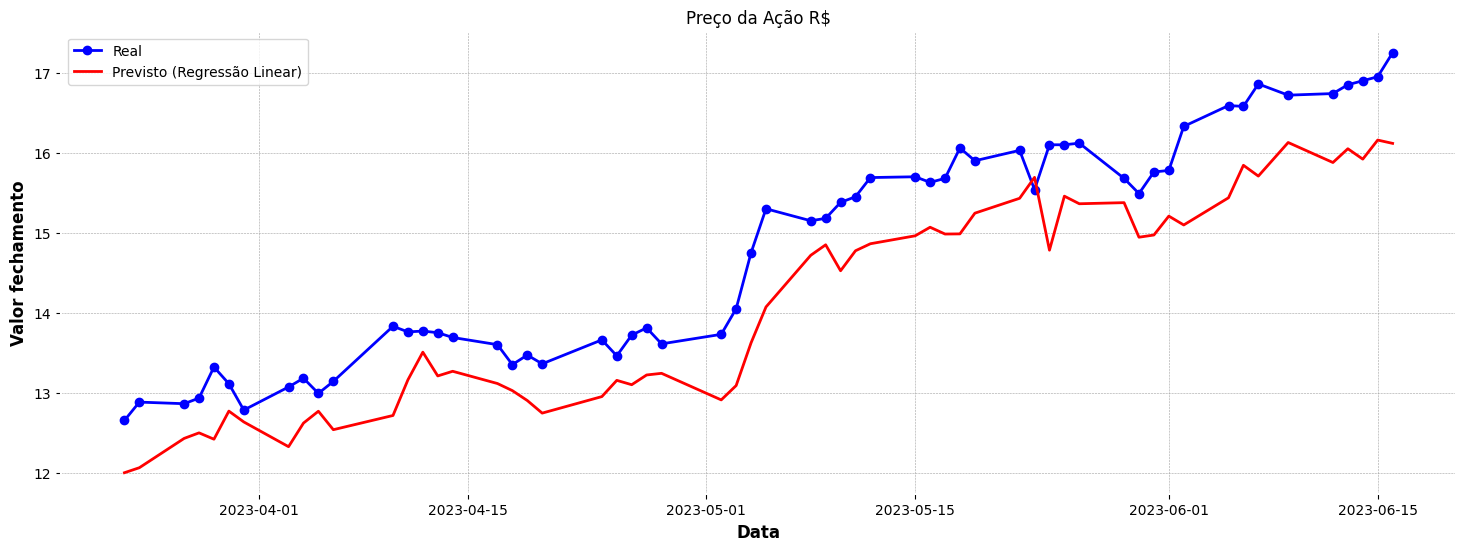

In [ ]:
# Plotagem
plt.figure(figsize=(18,6))
plt.title("Preço da Ação R$")
plt.plot(df["real"], label="Real", color="blue", marker='o')
plt.plot(df["previsao_lr"], label="Previsto (Regressão Linear)", color="red")
plt.xlabel("Data")
plt.ylabel("Valor fechamento")
plt.legend()
plt.show()

O resultado do modelo de regressão linear a partir dos dados fornecidos é uma previsão do valor da variável "Adj Close"(**Valor fechamento**) eixo y para cada data presente no eixo x do gráfico. A linha **Azul** "Real" representa os valores reais observados, enquanto a linha **Vermelha** "Previsão (Regressão Linear)" apresenta os valores previstos pelo modelo de regressão linear.

Comparando os valores reais com as previsões, podemos analisar a qualidade do modelo. Quanto mais próximas as previsões estiverem dos valores reais, melhor será o desempenho do modelo. Por exemplo, se as previsões estiverem consistentemente próximas dos valores reais, isso indica uma boa capacidade de generalização do modelo para realizar previsões em dados não vistos anteriormente.

Traremos as métricas a seguir para avaliar o desempenho

##Métricas Avaliação Desempenho Modelo 1


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Avaliação da regressão linear
mse = mean_squared_error(y_test, pred_lr)
r2 = r2_score(y_test, pred_lr)

print(f"Erro quadrático médio (MSE): {mse:.2f}")
print(f"Coeficiente de determinação (R2): {r2:.2f}")

Erro quadrático médio (MSE): 0.43
Coeficiente de determinação (R2): 0.71


Com base nos resultados fornecidos, o modelo de regressão linear apresentou um desempenho razoável. Os valores indicam que o modelo foi capaz de explicar aproximadamente 71% da variabilidade dos dados de destino (variável "Adj Close") com base nas features selecionadas. Um coeficiente de determinação (R²) de 0.71 é considerado moderadamente bom.

Além disso, o Erro Quadrático Médio (MSE) foi calculado como 0.43. O MSE é uma medida do erro médio ao quadrado entre os valores reais e as previsões do modelo. Quanto menor o valor do MSE, melhor é o desempenho do modelo em termos de ajuste aos dados.

No geral, esses resultados indicam que o modelo de regressão linear foi capaz de capturar uma parte significativa da variação nos dados e obter previsões relativamente precisas.

## Iniciando Algoritmo Segundo Modelo

Assim como no anterior, importamos as bibliotecas necessárias;

O novo modelo criado utilizará um DataFrame contendo apenas os preços de fechamento do ativo da bolsa de valores. Em seguida, é adicionada uma nova coluna chamada "Avg Close", que representa a média móvel dos preços de fechamento com uma janela de 21 períodos.

Nesse modelo iremos trabalhar com gráficos:

- O primeiro fará o cálculo da média móvel, na qual é comumente utilizado para visualizar e analisar a tendência dos preços ao longo do tempo, identificar padrões e suavizar o ruído dos dados diários. A média móvel é uma ferramenta útil para observar a direção geral dos preços e ajudar na tomada de decisões de investimento.

- O segundo é útil para analisar a relação entre os preços de fechamento e a média móvel de curto prazo, identificando momentos em que os preços podem estar acima ou abaixo da média, o que pode ser relevante para estratégias de negociação baseadas em tendências de curto prazo.

- O terceiro ajuda a identificar os momentos em que as médias móveis curtas cruzam acima ou abaixo das médias móveis longas, indicando possíveis pontos de entrada ou saída em uma estratégia de negociação baseada em médias móveis.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error

In [ ]:
ticker = 'BBDC4.SA'
df2 = yf.download(ticker, start='2022-06-20', end='2023-06-20')
print(df2.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2022-06-20  18.660000  19.139999  18.629999  18.969999  17.787029  38181500
2022-06-21  18.879999  19.049999  18.540001  18.639999  17.660631  30440200
2022-06-22  18.639999  18.680000  18.410000  18.559999  17.584835  35022300
2022-06-23  18.650000  18.650000  17.990000  18.070000  17.120581  36957800
2022-06-24  18.190001  18.190001  17.920000  17.920000  16.978460  34188700


In [ ]:
# Criando um DataFrame com os preços de fechamento
df2 = pd.DataFrame(df2["Close"])

In [ ]:
# Removendo valores ausentes
df2.dropna(inplace=True)

In [ ]:
df2["Avg Close"] = df2["Close"].rolling(window=21).mean()

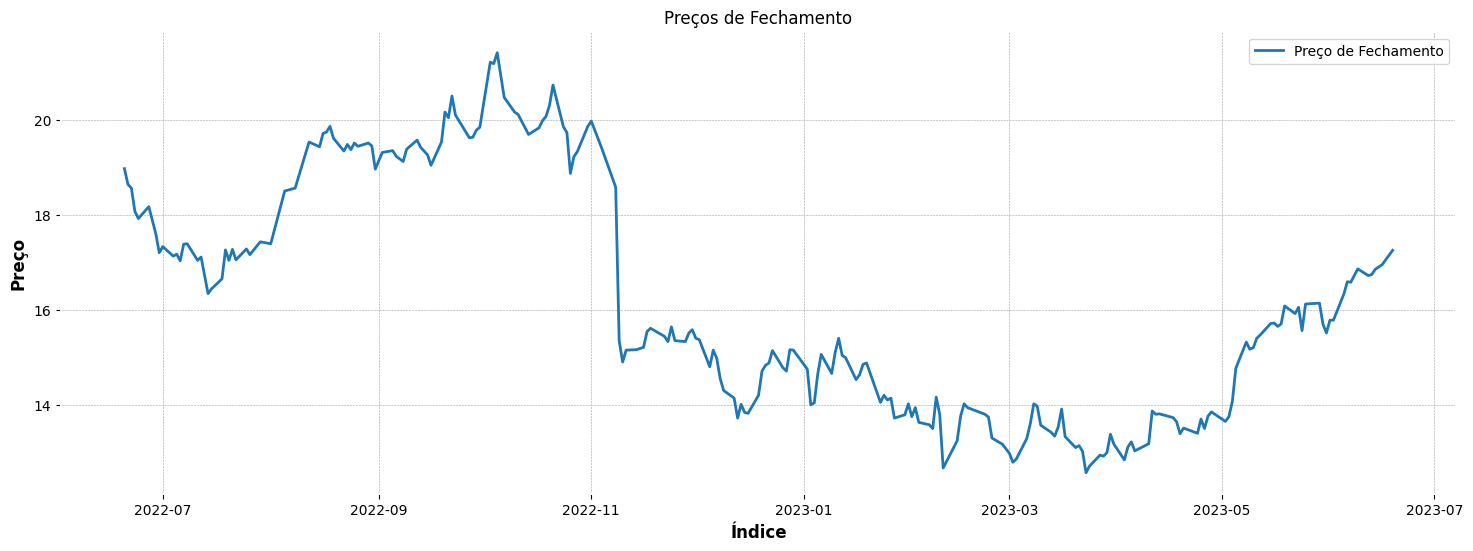

In [ ]:
plt.figure(figsize=(18, 6))

# Plot dos preços de fechamento
plt.plot(df2['Close'], label='Preço de Fechamento')

# Personalizar o gráfico
plt.title('Preços de Fechamento')
plt.xlabel('Índice')
plt.ylabel('Preço')
plt.legend()

# Exibir o gráfico
plt.show()

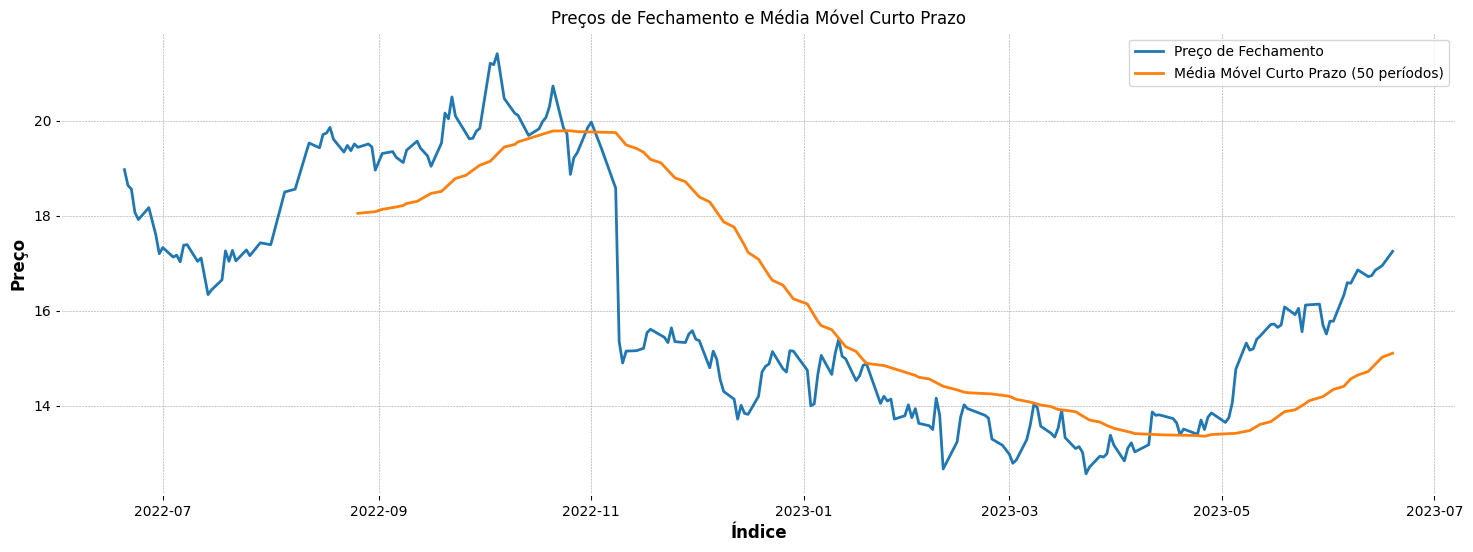

In [ ]:
# Definir o tamanho da figura do gráfico
plt.figure(figsize=(18, 6))

# Plot dos preços de fechamento
plt.plot(df2['Close'], label='Preço de Fechamento')

# Plot da média móvel de curto prazo
df2['SMA_short'] = df2['Close'].rolling(window=50).mean()
plt.plot(df2['SMA_short'], label='Média Móvel Curto Prazo (50 períodos)')

# Personalizar o gráfico
plt.title('Preços de Fechamento e Média Móvel Curto Prazo')
plt.xlabel('Índice')
plt.ylabel('Preço')
plt.legend()

# Exibir o gráfico
plt.show()

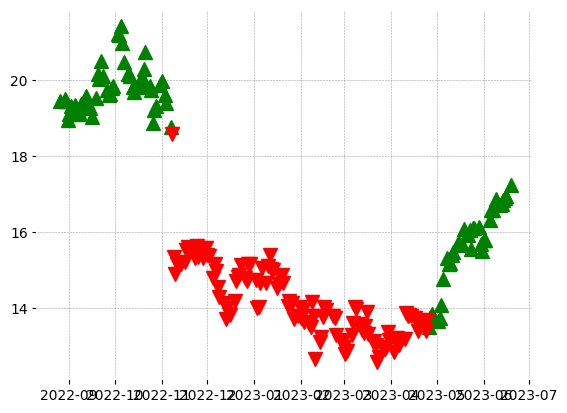

In [ ]:
# Cálculo das médias móveis curtas e longas
df2['SMA_short'] = df2['Close'].rolling(window=21).mean()
df2['SMA_long'] = df2['Close'].rolling(window=50).mean()


# Plot dos pontos de entrada e saída
df2['Signal'] = 0

df2.loc[df2['SMA_short'] > df2['SMA_long'], 'Signal'] = 1

df2.loc[df2['SMA_short'] < df2['SMA_long'], 'Signal'] = -1

# Plot dos pontos de entrada e saída
plt.plot(df2[df2['Signal'] == 1].index, df2[df2['Signal'] == 1]['Close'], '^', markersize=10, color='g', label='Ponto de Entrada')
plt.plot(df2[df2['Signal'] == -1].index, df2[df2['Signal'] == -1]['Close'], 'v', markersize=10, color='r', label='Ponto de Saída')

Os pontos de entrada são marcados com setas para cima e os pontos de saída são marcados com setas para baixo.

## Treino e Teste Segundo Modelo

In [ ]:
X = df2[["Avg Close"]] # Aqui definimos a variável X como uma coluna do DataFrame contendo os valores da média de fechamento

y = df2["Close"] # Aqui definimos a variável y como a coluna do DataFrame df contendo os valores de fechamento do ativo.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Remove as amostras com valores ausentes do DataFrame
df2.dropna(inplace=True)

# Cria um objeto SimpleImputer para preencher os valores ausentes com a média
imputer = SimpleImputer(strategy='mean')

# Aplica o preenchimento nos conjuntos X_train
X_train_imputed = imputer.fit_transform(X_train)

In [ ]:
# Treina o modelo com os dados imputados
model = DecisionTreeRegressor()
model.fit(X_train_imputed, y_train)

DecisionTreeRegressor()

## Realizando Previsão do Modelo Treinado

In [ ]:
# Aplica o preenchimento nos conjuntos X_test
X_test_imputed = imputer.transform(X_test)

# Faz as previsões com base nos dados de teste
y_pred = model.predict(X_test_imputed)

In [ ]:
# ... Código anterior ...

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ... Código anterior ...

# Faz as previsões com base nos dados de teste
predictions = model.predict(X_test_imputed)

Optamos pelo gráfico de dispersão (scatter plot). Nesse tipo de gráfico, os valores reais e as previsões são plotados em um espaço bidimensional, facilitando a comparação entre eles.

No caso da comparação entre valores reais e previsões, o gráfico de dispersão é utilizado para visualizar o quão próximas ou distantes as previsões estão dos valores reais. Cada ponto no gráfico representa um par de valores: o valor real e a respectiva previsão.

Ao plotar os pontos reais e as previsões no gráfico de dispersão, é possível observar a distribuição dos pontos em relação a uma linha de referência. Quanto mais próximos os pontos estiverem dessa linha, mais precisas são as previsões.

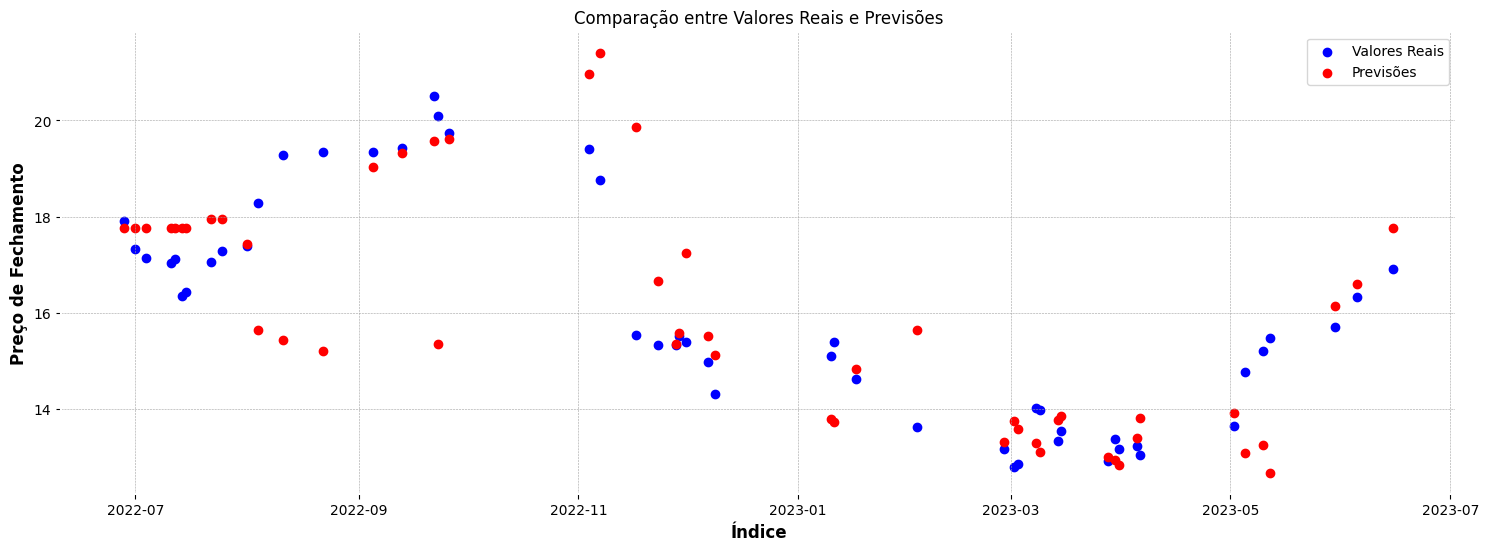

In [ ]:
plt.figure(figsize=(18, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Valores Reais')
plt.scatter(y_test.index, predictions, color='red', label='Previsões')
plt.xlabel('Índice')
plt.ylabel('Preço de Fechamento')
plt.title('Comparação entre Valores Reais e Previsões')
plt.legend()
plt.show()

No exemplo mencionado, os valores reais são representados pelos pontos azuis e as previsões são representadas pelos pontos vermelhos. Comparando a posição dos pontos, é possível verificar se as previsões estão acima ou abaixo dos valores reais e em que medida há discrepâncias entre eles.<br>
<br>
<br>

##Métricas Avaliação Desempenho Modelo 2

In [ ]:
predictions = model.predict(X_test_imputed)

# Calcular as métricas
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Exibir os resultados
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 1.1256462383270263
Mean Squared Error (MSE): 2.628012237083808
Root Mean Squared Error (RMSE): 1.6211145046182913
R-squared (R²): 0.46969021124049637



Com base nos valores obtidos para as métricas de avaliação do modelo, temos:

- Mean Absolute Error (MAE): 1.1256
O MAE representa a média das diferenças absolutas entre as previsões e os valores reais. Quanto menor o valor do MAE, melhor é o desempenho do modelo. Nesse caso, o MAE de 1.1256 indica que, em média, as previsões do modelo estão desviando 1.1256 unidades dos valores reais.

- Mean Squared Error (MSE): 2.6280
O MSE calcula a média dos erros quadráticos entre as previsões e os valores reais. Valores mais baixos indicam um melhor ajuste do modelo. Nesse caso, o MSE de 2.6280 indica que, em média, o quadrado do desvio das previsões em relação aos valores reais é de 2.6280.

- Root Mean Squared Error (RMSE): 1.6211
O RMSE é a raiz quadrada do MSE e fornece uma medida do desvio padrão dos erros. Assim como o MSE, valores menores indicam um melhor ajuste do modelo aos dados. Nesse caso, o RMSE de 1.6211 indica que, em média, o desvio das previsões em relação aos valores reais é de 1.6211 unidades.

- R-squared (R²): 0.4697
O R² representa a proporção da variância dos valores dependentes que é explicada pelo modelo. Valores mais próximos de 1 indicam um melhor ajuste. Nesse caso, o R² de 0.4697 indica que o modelo explica aproximadamente 46.97% da variância dos valores dependentes.

Com base nessas métricas, podemos concluir que o desempenho do modelo atual é inferior ao modelo anterior, uma vez que o MAE, MSE e RMSE são maiores e o R² é menor. Isso sugere que o modelo atual apresenta um ajuste menos preciso aos dados e faz previsões com um nível de erro maior em comparação ao modelo anterior.

##Iniciando Algoritmo Terceiro Modelo

Importando as bibliotecas, criando um DataFrame do inicio para não se confundir com os modelos anteriores.

Pré processar os dados e criar a variavel alvo, seprara conjuntos de treino e teste.

Treinar esses modeloes e fazer a previsão, a escolha do terceiro foi plotar com grafico de candlestick com os preços do ativo, juntamente com as previsões de alta e baixa feitas pelo modelo.

Seguimos o mesmo padrao para metrica de desempenho

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
ticker = 'BBDC4.SA'
df3 = yf.download(ticker, start='2022-06-20', end='2023-06-20')

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Calcular a diferença entre os preços de fechamento em dias consecutivos
df3["PriceDiff"] = df3["Close"].diff()

# Criar a coluna "Direction" que indica se houve alta (1) ou queda (0) no preço
df3["Direction"] = df3["PriceDiff"].apply(lambda x: 1 if x > 0 else 0)

# Remover a primeira linha, já que não há diferença para calcular
df3 = df3.dropna()

In [ ]:
# Selecionar as features
features = ["Open", "High", "Low", "Close", "Volume"]

# Separar os dados em features (X) e variável alvo (y)
X = df3[features]
y = df3["Direction"]

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Criar o modelo de regressão logística
model = LogisticRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Fazer previsões com os dados de teste
predictions = model.predict(X_test)

<ipython-input-43-c2fa5415f3af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Predictions"] = 0


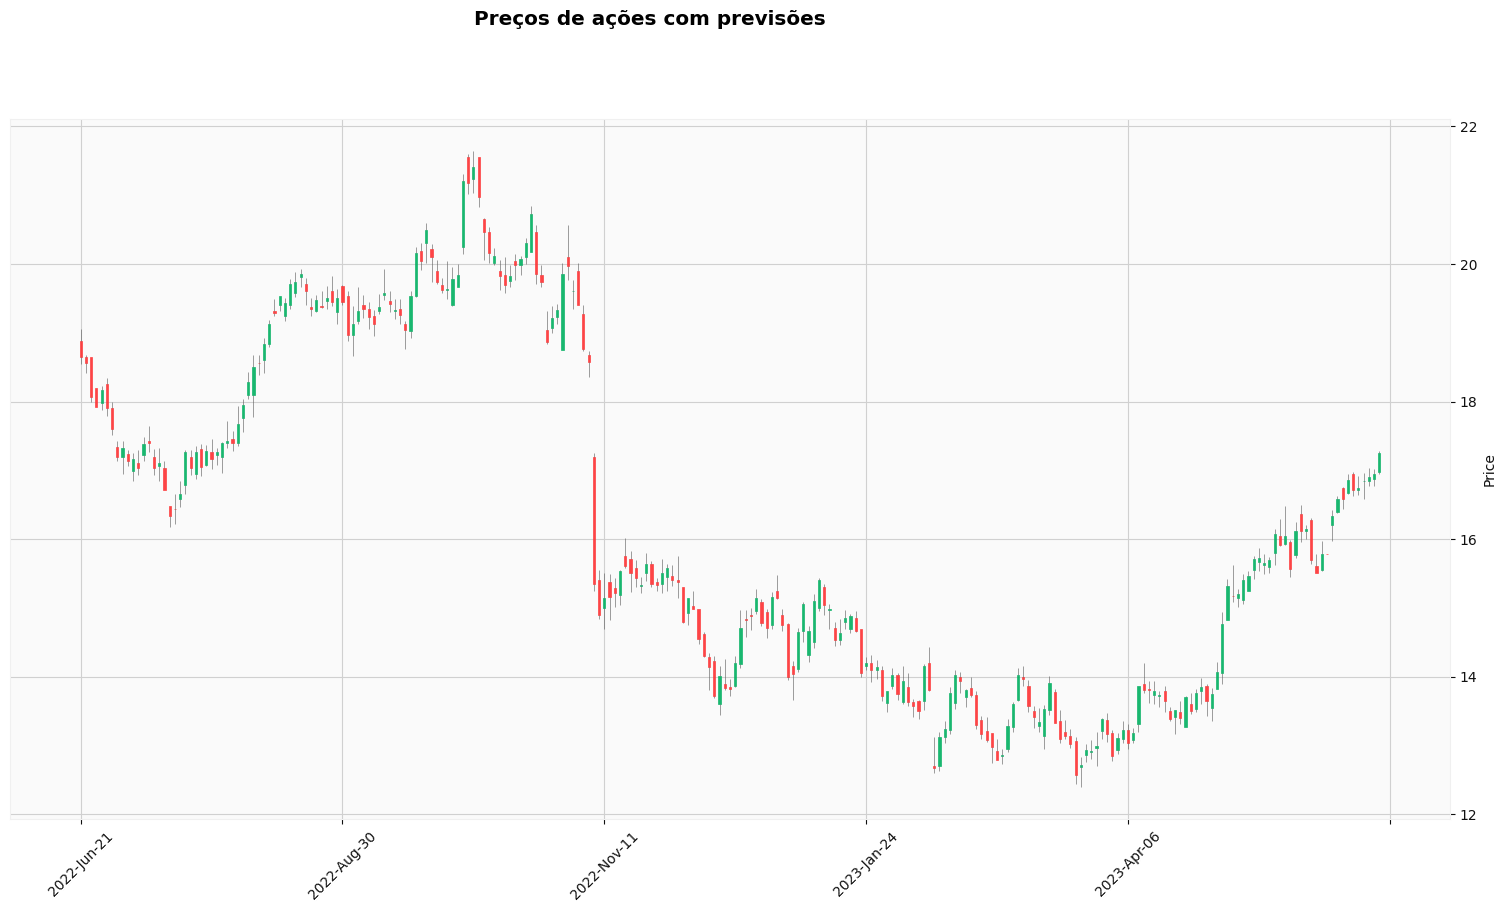

In [ ]:
# Adicionar as previsões ao DataFrame de dados
df3["Predictions"] = 0
df3.loc[X_test.index, "Predictions"] = predictions

# Converter o índice do DataFrame para o formato de data do mplfinance
df3.index = pd.to_datetime(df3.index)

# Plotar o gráfico de candlestick com as previsões
mpf.plot(df3, type="candle", style="yahoo", ylabel="Price", title="Preços de ações com previsões", figsize=(20, 10))

##Métricas Avaliação Desempenho Modelo 3

In [ ]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Imprimir as métricas de avaliação
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 0.54
Mean Squared Error (MSE): 0.54
Root Mean Squared Error (RMSE): 0.7348469228349535
R-squared (R²): -1.1739130434782603


No caso das métricas apresentadas, é importante notar que o valor negativo do R² indica que o modelo não se ajusta bem aos dados e pode haver um problema de sobreajuste ou algum outro problema no modelo. Além disso, o MAE, MSE e RMSE relativamente baixos sugerem uma boa precisão das previsões, mas o valor negativo do R² deve ser investigado com mais detalhes.

#Conclusão

Com base nas métricas de avaliação fornecidas para cada modelo, podemos comparar o desempenho dos três modelos da seguinte forma:

###**Modelo 1: Regressão Linear**

Mean Squared Error (MSE): 0.43<br>
R-squared (R²): 0.71<br>
<br>

###**Modelo 2: Árvore de Regressão**

Mean Absolute Error (MAE): 1.13<br>
Mean Squared Error (MSE): 2.63<br>
Root Mean Squared Error (RMSE): 1.62<br>
R-squared (R²): 0.47<br>
<br>

###**Modelo 3:**

Mean Absolute Error (MAE): 0.54<br>
Mean Squared Error (MSE): 0.54<br>
Root Mean Squared Error (RMSE): 0.73<br>
R-squared (R²): -1.17<br>
<br>

A partir dessas métricas, podemos observar que a Regressão Linear apresentou um desempenho melhor em comparação com os outros dois modelos, pois obteve um valor mais baixo de MSE e um valor mais alto de R². Isso indica que a regressão linear conseguiu prever os valores mais próximos dos reais e explicar uma maior porcentagem da variância dos dados.

A Árvore de Regressão apresentou um MAE mais alto, indicando uma maior média do erro absoluto em relação aos valores reais. Além disso, o R² foi relativamente baixo, indicando que o modelo não conseguiu explicar uma grande parte da variância dos dados.

A Regressão Logística Temporal apresentou um desempenho pior em comparação com os outros dois modelos. O MAE, MSE e RMSE foram mais altos, indicando uma maior média do erro absoluto e um maior erro quadrático médio. Além disso, o R² foi negativo, o que sugere que o modelo não se ajustou bem aos dados.<br>
<br>

<div class="alert alert-block-sucess">
<b>Portanto, com base nessas métricas, o modelo 1 - Regressão Linear parece ser a melhor opção entre os três modelos para prever os valores da ação.</b>
</div>